In [1]:
import pandas as pd


Lets use a csv table of Home values from Zillow here. I have downloaded them for all the zips that are AVAILABLE in Denver

In [2]:
csv_file = "https://davemetzler.github.io/jupyter/home_values.csv"
#that 

In [28]:
df = pd.read_csv(csv_file)
df.set_index('Date', inplace=True)

Lets trim this down a bit to the last 2 years of data. looking at information from 1996 will not be all that insightful

In [29]:
df[-24:]

,80237,80236,80239,80238,80246,80247,80249,80010,80123,80202,...,80218,80221,80220,80223,80222,80224,80227,80231,80230,80235
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-31,425000,346000,275800,557000,437000,206200,305700,253000,379600,483800,...,419100,293900,482400,301800,413400,434200,359700,313000,601200,332300
2017-09-30,425700,347300,276500,556000,436700,207600,306700,254100,380900,484800,...,421100,296100,484100,303900,415300,435500,362700,315500,603600,334400
2017-10-31,425900,348700,277100,555800,435200,210300,308000,255600,382700,484500,...,422600,297200,484900,306000,416100,436400,365400,318000,605700,336400
2017-11-30,426900,350900,278300,557400,436300,213400,310300,258200,385000,485200,...,424200,298800,486800,308400,417500,438100,368000,322100,606300,338900
2017-12-31,430000,354700,280200,561000,439600,215500,313700,261200,387300,487500,...,427600,301400,490200,311700,420300,441000,371100,327200,608400,342700
2018-01-31,435100,360500,283600,567400,444400,218300,318200,264600,390700,491600,...,433100,305100,496900,316000,424600,445500,375300,332200,612900,347100
2018-02-28,439000,366600,288200,574800,449800,222600,322900,268900,394600,497300,...,438500,309500,505400,320700,428900,451100,380600,336500,617800,350700
2018-03-31,440500,371000,291800,579200,452200,226200,326300,272800,397600,502400,...,441200,312900,512100,324300,431500,455300,385100,338600,619500,352900
2018-04-30,440800,374100,293900,581500,452600,227700,328700,275400,399600,505700,...,441900,314500,515900,326600,433400,458000,387200,338500,621800,354300


If for some reason you would like to flip it, so the dates as the columns and the zips as the rows, well you just get your T on like below

In [30]:
df2 = df.T

Lets just make a new Dataframe with the last 2 years, it will allow us to get some numbers like max, median, all that jazz

In [32]:
last_two_years = df[-24:]

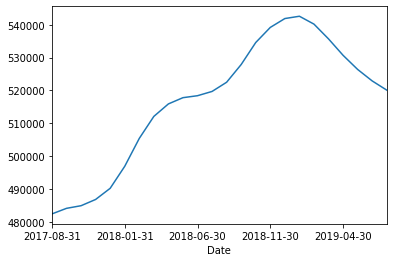

In [39]:
#here is a plot for one Zip code
ax = last_two_years['80220'].plot() 
ax

In [40]:
last_two_years['80220'].mean()

516637.5

###  while that curve is interesting, i think it would be more insightful to see how that data compares to the mean of home values for the last 2 years. This way, we could see what these values are doing in a normalized way

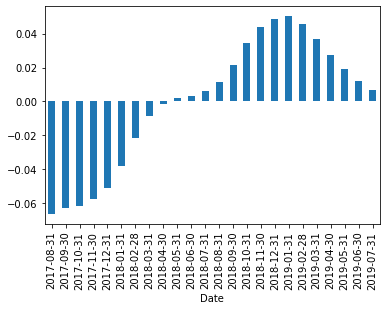

In [70]:

# lets take the values for the last 2 years of sales for the zip 80220. we will then divide that by the mean of 
#all the values for that zip. finally we will subtract 1 to see when the sales were below the mean, and when they were above
a =((last_two_years['80220'] / last_two_years['80220'].mean())-1).plot(kind='bar')


It looks like the numbers are falling back to the mean, so we are soon getting to the point that, on average, there will be no gain or loss over 2 years

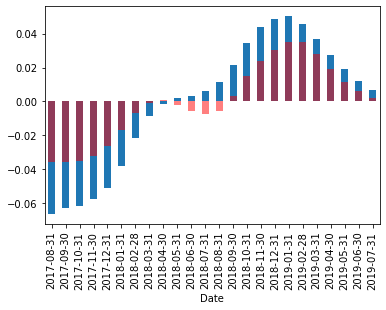

In [77]:
#lets plot another zip to see how they compare

a =((last_two_years['80220'] / last_two_years['80220'].mean())-1).plot(kind='bar')
ab =((last_two_years['80206'] / last_two_years['80206'].mean())-1).plot(kind='bar', ax=a, color='red', alpha=0.5)


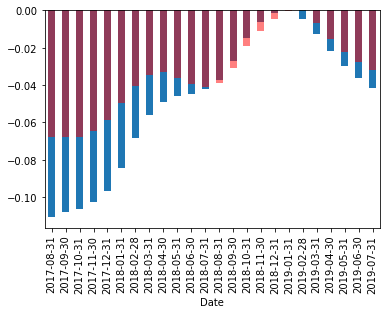

In [74]:
##let look at max

a =((last_two_years['80220'] / last_two_years['80220'].max())-1).plot(kind='bar')
ab =((last_two_years['80206'] / last_two_years['80206'].max())-1).plot(kind='bar', ax=a, color='red', alpha=0.5)


well it looks like if you purchased a home in January of 2019, you may have picked a bad month to move to mayfair. at least in the short term

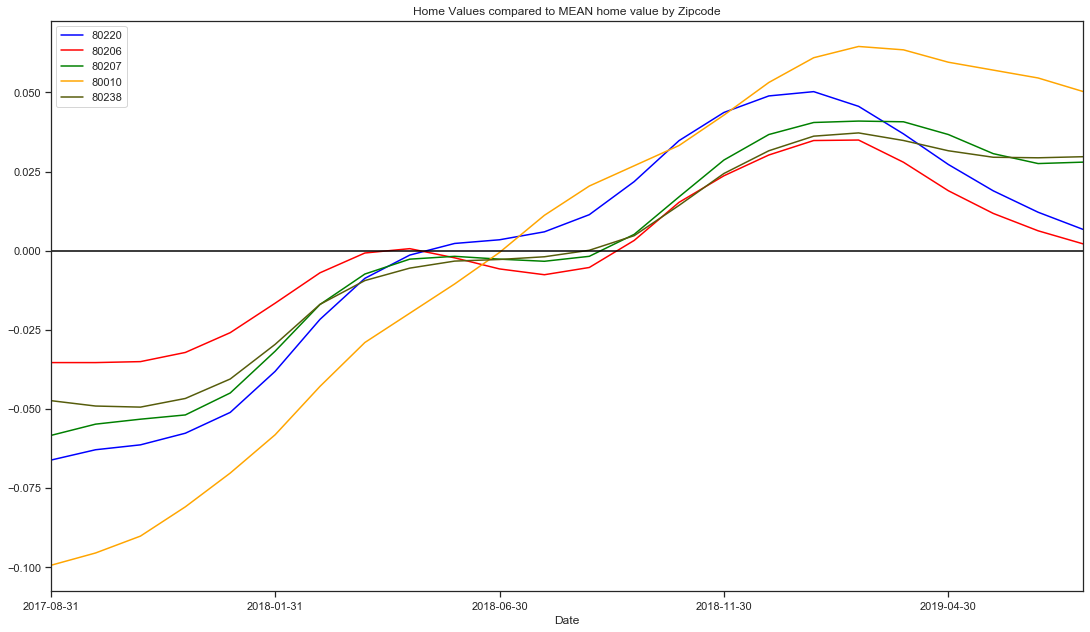

In [197]:
#lets change this up to a line for the MEAN, and add a zero line too it. also, lets go crazy and get a few more zips on there
fig = plt.figure()

a =((last_two_years['80220'] / last_two_years['80220'].mean())-1).plot(kind='line',color='blue', label='80220')
ab =((last_two_years['80206'] / last_two_years['80206'].mean())-1).plot(kind='line', ax=a, color='red', label='80206')
ac =((last_two_years['80207'] / last_two_years['80207'].mean())-1).plot(kind='line', ax=a, color='green', label='80207')
ad =((last_two_years['80010'] / last_two_years['80010'].mean())-1).plot(kind='line', ax=a, color='orange', label='80010')
ae =((last_two_years['80238'] / last_two_years['80238'].mean())-1).plot(kind='line', ax=a, color='#565c0b', label='80238')


plt.axhline(y=0, color='black', linestyle='-')
plt.title('Home Values compared to MEAN home value by Zipcode')
fig.set_size_inches(18.5, 10.5)
plt.legend()


As you can see its pretty much the same curve, too be expected, but if you are a line person well i suppose this is your jam!

In [1]:
#lets try over 4 years instead of the 2. notice how easy it is to look at the main dataframe, not the two year one we used in 
#previous example
fig = plt.figure()

a =((df[-48:]['80220'] / df[-48:]['80220'].mean())-1).plot(kind='line',color='blue', label='80220')
ab =((df[-48:]['80206'] / df[-48:]['80206'].mean())-1).plot(kind='line', ax=a, color='red', label='80206')
ac =((df[-48:]['80207'] / df[-48:]['80207'].mean())-1).plot(kind='line', ax=a, color='green', label='80207')
ad =((df[-48:]['80010'] / df[-48:]['80010'].mean())-1).plot(kind='line', ax=a, color='orange', label='80010')
ae =((df[-48:]['80238'] / df[-48:]['80238'].mean())-1).plot(kind='line', ax=a, color='#565c0b', label='80238')

plt.axhline(y=0, color='black', linestyle='-')
plt.legend()

fig.set_size_inches(18.5, 10.5)
plt.title('Home Values compared to MEAN home value by Zipcode')
#fig.savefig('4 years.png')

NameError: name 'plt' is not defined

so if you bought a few years ago, you are still way ahead of the mean, nice.

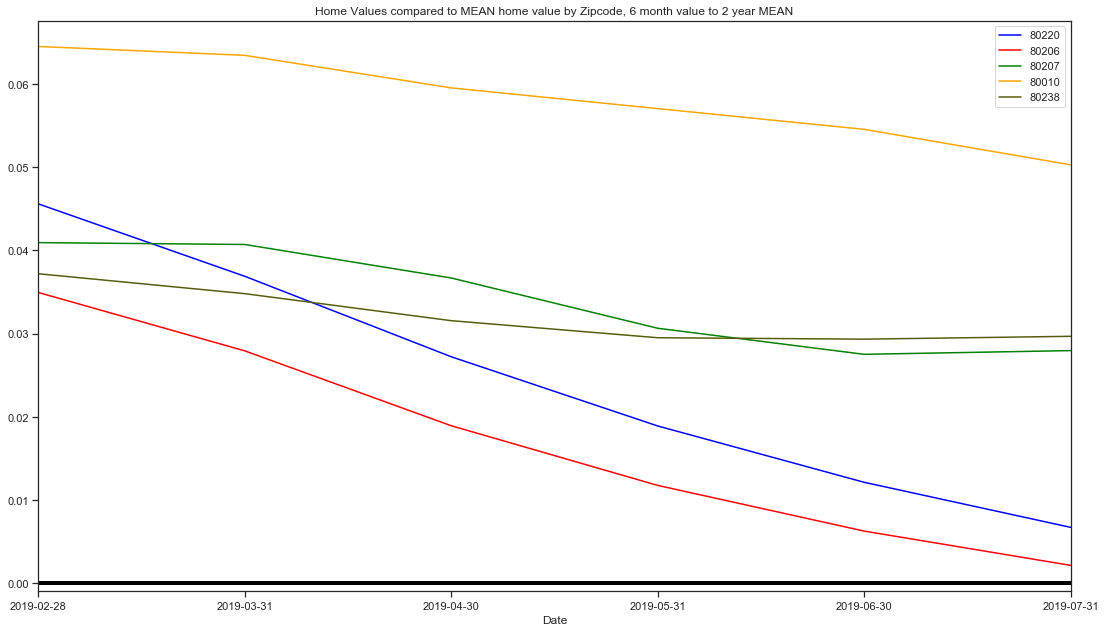

In [200]:
##and for one more, lets do the last 6 months! Notice how the mean is still the last 2 years, take that anna!

fig = plt.figure()

a =((df[-6:]['80220'] / df[-24:]['80220'].mean())-1).plot(kind='line',color='blue', label='80220')
ab =((df[-6:]['80206'] / df[-24:]['80206'].mean())-1).plot(kind='line', ax=a, color='red', label='80206')
ac =((df[-6:]['80207'] / df[-24:]['80207'].mean())-1).plot(kind='line', ax=a, color='green', label='80207')
ad =((df[-6:]['80010'] / df[-24:]['80010'].mean())-1).plot(kind='line', ax=a, color='orange', label='80010')
ae =((df[-6:]['80238'] / df[-24:]['80238'].mean())-1).plot(kind='line', ax=a, color='#565c0b', label='80238')

plt.axhline(y=0, color='black', linestyle='-',  linewidth=4)
plt.legend()

fig.set_size_inches(18.5, 10.5)
plt.title('Home Values compared to MEAN home value by Zipcode, 6 month value to 2 year MEAN')
fig.savefig('6 months.png')

## there is much more we could do, for example we could programically take a look at the data and make the charts, use a different library for charting to make it pop and lock, or map it using some other resources. the possibilies are endless!